Initialization centers complete
Initialization concentrations complete
Converged at iteration 18: center shift 1.779260e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Converged at iteration 17: center shift 3.031116e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Converged at iteration 17: center shift 2.514701e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Converged at iteration 18: center shift 2.036376e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Converged at iteration 18: center shift 1.727007e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Converged at iteration 17: center shift 2.607854e-09 within tolerance 3.125542e-09
Initialization centers complete
Initialization concentrations complete
Conve

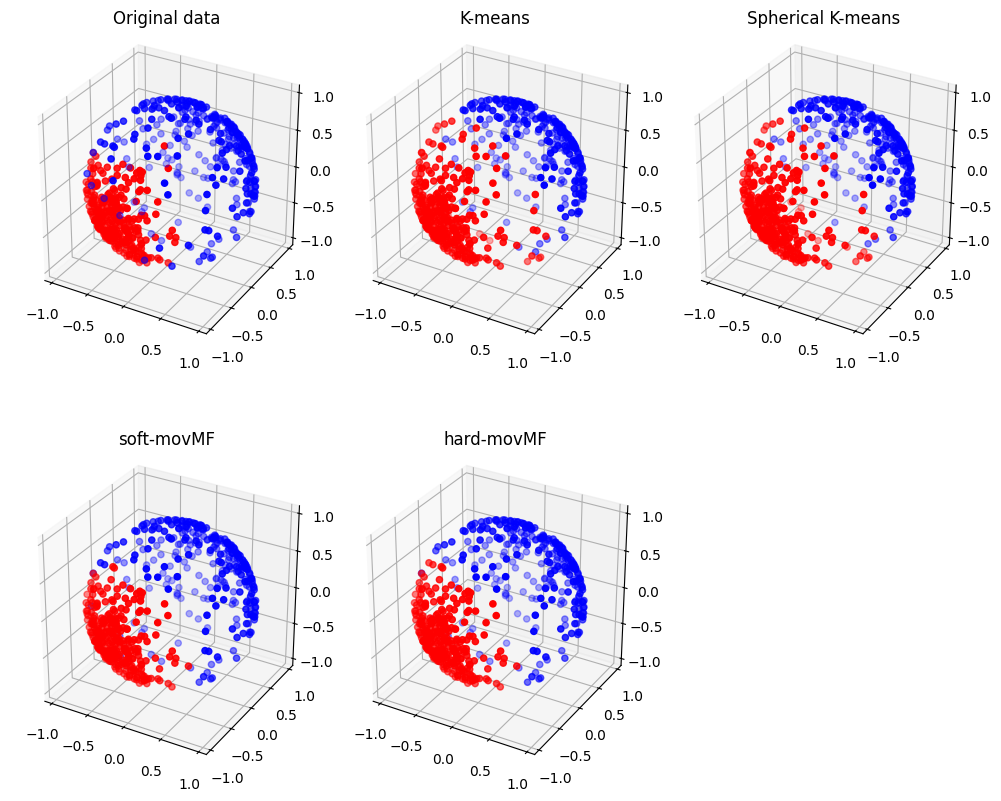

mu 0: [-0.24962461 -0.96269572 -0.10442464]
mu 0: [-0.20941971 -0.8118673  -0.07213683] (kmeans), error=0.15939933570535283 (0.018831818750933434)
mu 0: [-0.2541264  -0.96201893 -0.09969632] (spherical kmeans), error=0.0065636210045128115
mu 0: [-0.25658535 -0.96057064 -0.10708873] (vmf-soft), error=0.007750171679209762
mu 0: [-0.26095549 -0.95984007 -0.10300135] (vmf-hard), error=0.01177154648090467
---
mu 1: [0.32486741 0.74662509 0.58052747]
mu 1: [0.2159888  0.53172371 0.32393155] (kmeans), error=0.35196394213030696 (0.10748788994026708)
mu 1: [0.33303455 0.79275602 0.51051531] (spherical kmeans), error=0.08424053570953308
mu 1: [0.33935544 0.7584758  0.55637429] (vmf-soft), error=0.03055680497962077
mu 1: [0.34495328 0.77490714 0.5296472 ] (vmf-hard), error=0.061580178923835244
---
true kappas [8, 2]
vmf-soft kappas [9.89328503 2.01085888]
vmf-hard kappas [9.34610604 2.33639988]
---
true weights [0.5, 0.5]
vmf-soft weights [0.49918146 0.50081854]
vmf-hard weights [0.52 0.48]
---
H

In [26]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics

from spherecluster import SphericalKMeans
from spherecluster import VonMisesFisherMixture
from spherecluster import sample_vMF

# plt.ion()


# def r_input(val=None):
#     val = val or ''
#     if sys.version_info[0] >= 3:
#         return eval(input(val))

#     return raw_input(val)


###############################################################################
# Generate small-mix dataset
mu_0 = np.array([-0.251, -0.968, -0.105])
mu_0 = mu_0 / np.linalg.norm(mu_0)
mu_1 = np.array([0.399, 0.917, 0.713])
mu_1 = mu_1 / np.linalg.norm(mu_1)
mus = [mu_0, mu_1]
kappa_0 = 8  # concentration parameter
kappa_1 = 2  # concentration parameter
kappas = [kappa_0, kappa_1]
num_points_per_class = 300

X_0 = sample_vMF(mu_0, kappa_0, num_points_per_class)
X_1 = sample_vMF(mu_1, kappa_1, num_points_per_class)
X = np.zeros((2 * num_points_per_class, 3))
X[:num_points_per_class, :] = X_0
X[num_points_per_class:, :] = X_1
labels = np.zeros((2 * num_points_per_class, ))
labels[num_points_per_class:] = 1


###############################################################################
# K-Means clustering
km = KMeans(n_clusters=2, init='k-means++', n_init=20)
km.fit(X)

cdists = []
for center in km.cluster_centers_:
    cdists.append(np.linalg.norm(mus[0] - center))

km_mu_0_idx = np.argmin(cdists)
km_mu_1_idx = 1 - km_mu_0_idx

km_mu_0_error = np.linalg.norm(mus[0] - km.cluster_centers_[km_mu_0_idx])
km_mu_1_error = np.linalg.norm(mus[1] - km.cluster_centers_[km_mu_1_idx])
km_mu_0_error_norm = np.linalg.norm(mus[0] - km.cluster_centers_[km_mu_0_idx] / np.linalg.norm(km.cluster_centers_[km_mu_0_idx]))
km_mu_1_error_norm = np.linalg.norm(mus[1] - km.cluster_centers_[km_mu_1_idx] / np.linalg.norm(km.cluster_centers_[km_mu_1_idx]))


###############################################################################
# Spherical K-Means clustering
skm = SphericalKMeans(n_clusters=2, init='k-means++', n_init=20)
skm.fit(X)

cdists = []
for center in skm.cluster_centers_:
    cdists.append(np.linalg.norm(mus[0] - center))

skm_mu_0_idx = np.argmin(cdists)
skm_mu_1_idx = 1 - skm_mu_0_idx

skm_mu_0_error = np.linalg.norm(mus[0] - skm.cluster_centers_[skm_mu_0_idx])
skm_mu_1_error = np.linalg.norm(mus[1] - skm.cluster_centers_[skm_mu_1_idx])


###############################################################################
# Mixture of von Mises Fisher clustering (soft)
vmf_soft = VonMisesFisherMixture(n_clusters=2, posterior_type='soft', n_init=20, init='k-means++', max_iter=100000, tol=1e-8,verbose=True)
vmf_soft.fit(X)

cdists = []
for center in vmf_soft.cluster_centers_:
    cdists.append(np.linalg.norm(mus[0] - center))

vmf_soft_mu_0_idx = np.argmin(cdists)
vmf_soft_mu_1_idx = 1 - vmf_soft_mu_0_idx

vmf_soft_mu_0_error = np.linalg.norm(
        mus[0] - vmf_soft.cluster_centers_[vmf_soft_mu_0_idx])
vmf_soft_mu_1_error = np.linalg.norm(
        mus[1] - vmf_soft.cluster_centers_[vmf_soft_mu_1_idx])


###############################################################################
# Mixture of von Mises Fisher clustering (hard)
vmf_hard = VonMisesFisherMixture(n_clusters=2, posterior_type='hard', n_init=20)
vmf_hard.fit(X)

cdists = []
for center in vmf_hard.cluster_centers_:
    cdists.append(np.linalg.norm(mus[0] - center))

vmf_hard_mu_0_idx = np.argmin(cdists)
vmf_hard_mu_1_idx = 1 - vmf_hard_mu_0_idx

vmf_hard_mu_0_error = np.linalg.norm(
        mus[0] - vmf_hard.cluster_centers_[vmf_hard_mu_0_idx])
vmf_hard_mu_1_error = np.linalg.norm(
        mus[1] - vmf_hard.cluster_centers_[vmf_hard_mu_1_idx])


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 9))

# Original data
ax = fig.add_subplot(2, 3, 1, projection='3d', adjustable='box', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1], zlim=[-1.1, 1.1])
ax.scatter(X_0[:, 0], X_0[:, 1], X_0[:, 2], c='r')
ax.scatter(X_1[:, 0], X_1[:, 1], X_1[:, 2], c='b')
ax.set_title('Original data')
ax.set_aspect('equal')

# K-means labels
ax = fig.add_subplot(2, 3, 2, projection='3d', adjustable='box', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1], zlim=[-1.1, 1.1])
ax.scatter(X[km.labels_ == km_mu_0_idx, 0], X[km.labels_ == km_mu_0_idx, 1], X[km.labels_ == km_mu_0_idx, 2], c='r')
ax.scatter(X[km.labels_ == km_mu_1_idx, 0], X[km.labels_ == km_mu_1_idx, 1], X[km.labels_ == km_mu_1_idx, 2], c='b')
ax.set_title('K-means')
ax.set_aspect('equal')

# Spherical K-means labels
ax = fig.add_subplot(2, 3, 3, projection='3d', adjustable='box', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1], zlim=[-1.1, 1.1])
ax.scatter(X[skm.labels_ == skm_mu_0_idx, 0], X[skm.labels_ == skm_mu_0_idx, 1], X[skm.labels_ == skm_mu_0_idx, 2], c='r')
ax.scatter(X[skm.labels_ == skm_mu_1_idx, 0], X[skm.labels_ == skm_mu_1_idx, 1], X[skm.labels_ == skm_mu_1_idx, 2], c='b')
ax.set_title('Spherical K-means')
ax.set_aspect('equal')

# von Mises Fisher soft labels
ax = fig.add_subplot(2, 3, 4, projection='3d', adjustable='box', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1], zlim=[-1.1, 1.1])
ax.scatter(X[vmf_soft.labels_ == vmf_soft_mu_0_idx, 0], X[vmf_soft.labels_ == vmf_soft_mu_0_idx, 1], X[vmf_soft.labels_ == vmf_soft_mu_0_idx, 2], c='r')
ax.scatter(X[vmf_soft.labels_ == vmf_soft_mu_1_idx, 0], X[vmf_soft.labels_ == vmf_soft_mu_1_idx, 1], X[vmf_soft.labels_ == vmf_soft_mu_1_idx, 2], c='b')
ax.set_title('soft-movMF')
ax.set_aspect('equal')

# von Mises Fisher hard labels
ax = fig.add_subplot(2, 3, 5, projection='3d', adjustable='box', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1], zlim=[-1.1, 1.1])
ax.scatter(X[vmf_hard.labels_ == vmf_hard_mu_0_idx, 0], X[vmf_hard.labels_ == vmf_hard_mu_0_idx, 1], X[vmf_hard.labels_ == vmf_hard_mu_0_idx, 2], c='r')
ax.scatter(X[vmf_hard.labels_ == vmf_hard_mu_1_idx, 0], X[vmf_hard.labels_ == vmf_hard_mu_1_idx, 1], X[vmf_hard.labels_ == vmf_hard_mu_1_idx, 2], c='b')
ax.set_title('hard-movMF')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

print('mu 0: {}'.format(mu_0))
print('mu 0: {} (kmeans), error={} ({})'.format(km.cluster_centers_[km_mu_0_idx], km_mu_0_error, km_mu_0_error_norm))
print('mu 0: {} (spherical kmeans), error={}'.format(skm.cluster_centers_[skm_mu_0_idx], skm_mu_0_error))
print('mu 0: {} (vmf-soft), error={}'.format(vmf_soft.cluster_centers_[vmf_soft_mu_0_idx], vmf_soft_mu_0_error))
print('mu 0: {} (vmf-hard), error={}'.format(vmf_hard.cluster_centers_[vmf_hard_mu_0_idx], vmf_hard_mu_0_error))

print('---')
print('mu 1: {}'.format(mu_1))
print('mu 1: {} (kmeans), error={} ({})'.format(km.cluster_centers_[km_mu_1_idx], km_mu_1_error, km_mu_1_error_norm))
print('mu 1: {} (spherical kmeans), error={}'.format(skm.cluster_centers_[skm_mu_1_idx], skm_mu_1_error))
print('mu 1: {} (vmf-soft), error={}'.format(vmf_soft.cluster_centers_[vmf_soft_mu_1_idx], vmf_soft_mu_1_error))
print('mu 1: {} (vmf-hard), error={}'.format(vmf_hard.cluster_centers_[vmf_hard_mu_1_idx], vmf_hard_mu_1_error))


print('---')
print('true kappas {}'.format(kappas))
print('vmf-soft kappas {}'.format(vmf_soft.concentrations_[[vmf_soft_mu_0_idx, vmf_soft_mu_1_idx]]))
print('vmf-hard kappas {}'.format(vmf_hard.concentrations_[[vmf_hard_mu_0_idx, vmf_hard_mu_1_idx]]))

print('---')
print('true weights {}'.format([0.5, 0.5]))
print('vmf-soft weights {}'.format(vmf_soft.weights_[[vmf_soft_mu_0_idx, vmf_soft_mu_1_idx]]))
print('vmf-hard weights {}'.format(vmf_hard.weights_[[vmf_hard_mu_0_idx, vmf_hard_mu_1_idx]]))

print('---')
print("Homogeneity: %0.3f (k-means)" % metrics.homogeneity_score(labels, km.labels_))
print("Homogeneity: %0.3f (spherical k-means)" % metrics.homogeneity_score(labels, skm.labels_))
print("Homogeneity: %0.3f (vmf-soft)" % metrics.homogeneity_score(labels, vmf_soft.labels_))
print("Homogeneity: %0.3f (vmf-hard)" % metrics.homogeneity_score(labels, vmf_hard.labels_))

print('---')
print("Completeness: %0.3f (k-means)" % metrics.completeness_score(labels, km.labels_))
print("Completeness: %0.3f (spherical k-means)" % metrics.completeness_score(labels, skm.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, vmf_soft.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, vmf_hard.labels_))

print('---')
print("V-measure: %0.3f (k-means)" % metrics.v_measure_score(labels, km.labels_))
print("V-measure: %0.3f (spherical k-means)" % metrics.v_measure_score(labels, skm.labels_))
print("V-measure: %0.3f (vmf-soft)" % metrics.v_measure_score(labels, vmf_soft.labels_))
print("V-measure: %0.3f (vmf-hard)" % metrics.v_measure_score(labels, vmf_hard.labels_))

# r_input()


In [27]:
filename = "D:/Github/datasets/raw_data/foam0/2/rawdataNonSpe.bin"
data = np.fromfile(filename, dtype=np.float32)
data = data.reshape(-1, 4)
print(data.shape)
x = data[:,0]
# print(np.max(data[:,1]))
phi = data[:,1]-np.pi
r = np.sqrt(1 - x**2)
y = r * np.cos(phi)
z = r * np.sin(phi)

X = np.column_stack((x, y, z))
ray_num = min(4096, X.shape[0])
X = X[:ray_num, :]
print(X.shape)

(1010853, 4)
(4096, 3)


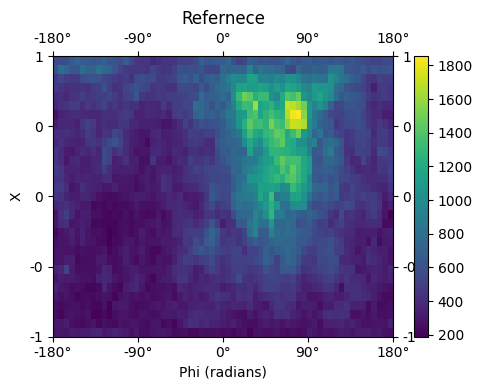

In [28]:
# 创建网格分布
num_bins = 32
x_edges = np.linspace(-1, 1, num_bins)  # x (cos(θ)) 方向划分
phi_edges = np.linspace(-np.pi, np.pi, num_bins*2)  # φ 方向划分

# 统计 (X, φ) 分布
H, _, _ = np.histogram2d(x, phi, bins=[x_edges, phi_edges])

# 创建热力图
fig, ax1 = plt.subplots(figsize=(5, 4)) 

# 绘制热力图
im1 = ax1.imshow(
    H,  # 转置以确保正确显示 X 和 φ 的方向
    extent=[phi_edges[0], phi_edges[-1], x_edges[0], x_edges[-1]],
    aspect='auto',
    origin='lower',
    cmap='viridis'
)

# 设置标题和坐标轴标签
ax1.set_title('Refernece')
ax1.set_xlabel('Phi (radians)')
ax1.set_ylabel('X')

# 设置 x 和 y 轴的刻度
phi_ticks = np.linspace(-np.pi, np.pi, 5)
phi_tick_labels = [f'{np.degrees(tick):.0f}°' for tick in phi_ticks]
x_ticks = np.linspace(-1, 1, 5)
x_tick_labels = [f'{tick:.0f}' for tick in x_ticks]

ax1.set_xticks(phi_ticks)
ax1.set_xticklabels(phi_tick_labels)
ax1.set_yticks(x_ticks)
ax1.set_yticklabels(x_tick_labels)

# 启用上侧和右侧刻度
ax1.tick_params(top=True, right=True, labeltop=True, labelright=True)

# 添加颜色条
fig.colorbar(im1, ax=ax1, orientation='vertical')


# 显示热力图
plt.tight_layout()
plt.show()


In [29]:
vmf_soft = VonMisesFisherMixture(n_clusters=128, posterior_type='soft', n_init=1, init='k-means++', max_iter=10000, tol=1e-10, n_jobs=1, verbose=True)
vmf_soft.fit(X)

weights = vmf_soft.weights_
means = vmf_soft.cluster_centers_
kappas = vmf_soft.concentrations_

Initialization centers complete
Initialization concentrations complete
Converged at iteration 968: center shift 2.107461e-11 within tolerance 2.126943e-11


In [30]:
import numpy as np
import math

# Multi von Mises-Fisher distribution function
def multi_vmf(weights, axes, kappas, w):
    # Ensure kappas are non-negative for stability
    kappas = np.clip(kappas, 1e-10, 1e5)

    # Define thresholds for approximations
    large_kappa_threshold = 1e5  # Threshold for considering kappa as "large"
    small_kappa_threshold = 1e-3  # Threshold for considering kappa as "small"

    # Approximate normalization constant for large and small kappa values
    norm_const = np.where(
        kappas > large_kappa_threshold,
        kappas / (2 * math.pi),  # Approximation for large kappa
        kappas / (4 * math.pi * (1 - np.exp(-2 * kappas)))
    )

    # Compute dot products between input w and the axes of the spheres (unit vectors)
    dot_products = np.dot(w, axes.T) - 1  # Shape: (data_sizes, num_spheres)

    # Compute the weighted von Mises-Fisher pdf values
    weighted_exps = weights * norm_const * np.exp(kappas * dot_products)  # Shape: (data_sizes, num_spheres)
    q = np.sum(weighted_exps, axis=-1)  # Shape: (data_sizes,)
    q = np.clip(q, 1e-10, 1e10)  # Further clamping to avoid extreme values
    return q
# 准备输入数据 X
i_idx = np.arange(32, dtype=np.float32) / 32
j_idx = np.arange(64, dtype=np.float32) / 64
i_grid, j_grid = np.meshgrid(i_idx, j_idx, indexing='ij')
pos_x = i_grid * 2 - 1
pos_phi = (j_grid * 2 - 1) * np.pi
pos_r = np.sqrt(1 - pos_x**2)
pos_y = pos_r * np.cos(pos_phi)
pos_z = pos_r * np.sin(pos_phi)
samples = np.stack((pos_x, pos_y, pos_z), axis=-1).reshape(-1, 3)
EM_results = multi_vmf(weights, means, kappas, samples).reshape(32, 64)

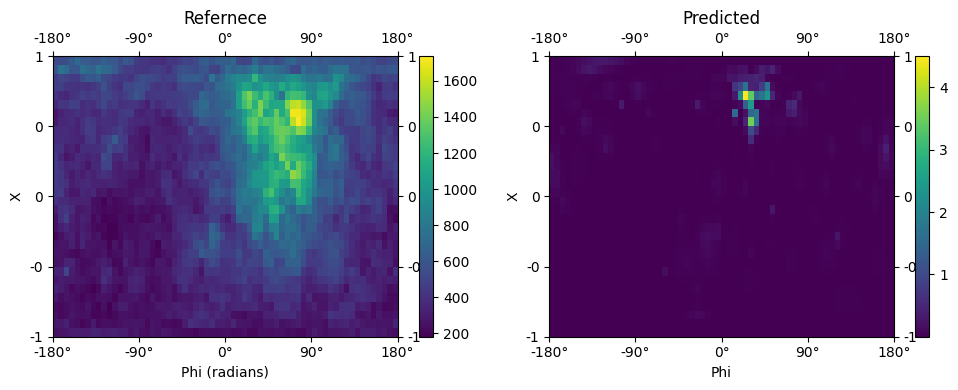

In [31]:
# 创建网格分布
num_bins = 32
x_edges = np.linspace(-1, 1, num_bins+1)  # x (cos(θ)) 方向划分
phi_edges = np.linspace(-np.pi, np.pi, num_bins*2+1)  # φ 方向划分

# 统计 (X, φ) 分布
H, _, _ = np.histogram2d(x, phi, bins=[x_edges, phi_edges])

# 创建热力图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 

# 绘制热力图
im1 = ax1.imshow(
    H,  # 转置以确保正确显示 X 和 φ 的方向
    extent=[phi_edges[0], phi_edges[-1], x_edges[0], x_edges[-1]],
    aspect='auto',
    origin='lower',
    cmap='viridis'
)

# 设置标题和坐标轴标签
ax1.set_title('Refernece')
ax1.set_xlabel('Phi (radians)')
ax1.set_ylabel('X')

# 设置 x 和 y 轴的刻度
phi_ticks = np.linspace(-np.pi, np.pi, 5)
phi_tick_labels = [f'{np.degrees(tick):.0f}°' for tick in phi_ticks]
x_ticks = np.linspace(-1, 1, 5)
x_tick_labels = [f'{tick:.0f}' for tick in x_ticks]

ax1.set_xticks(phi_ticks)
ax1.set_xticklabels(phi_tick_labels)
ax1.set_yticks(x_ticks)
ax1.set_yticklabels(x_tick_labels)

# 启用上侧和右侧刻度
ax1.tick_params(top=True, right=True, labeltop=True, labelright=True)

# 添加颜色条
fig.colorbar(im1, ax=ax1, orientation='vertical')


im2 = ax2.imshow(
    EM_results,
    extent=[phi_edges[0], phi_edges[-1], x_edges[0], x_edges[-1]],
    aspect='auto',
    origin='lower',
    cmap='viridis'  # Different color map for better differentiation
)
ax2.set_title(f'Predicted')
ax2.set_xlabel('Phi')
ax2.set_ylabel('X')
# Set x and y ticks for the second subplot
ax2.set_xticks(phi_ticks)
ax2.set_yticks(x_ticks)
# Set tick labels in degrees for the second subplot
ax2.set_xticklabels(phi_tick_labels)
ax2.set_yticklabels(x_tick_labels)

# Enable ticks on top and right for the second subplot
ax2.tick_params(top=True, right=True, labeltop=True, labelright=True)

# Add colorbar to the ray data heatmap
fig.colorbar(im2, ax=ax2, orientation='vertical')

# 显示热力图
plt.tight_layout()
plt.show()


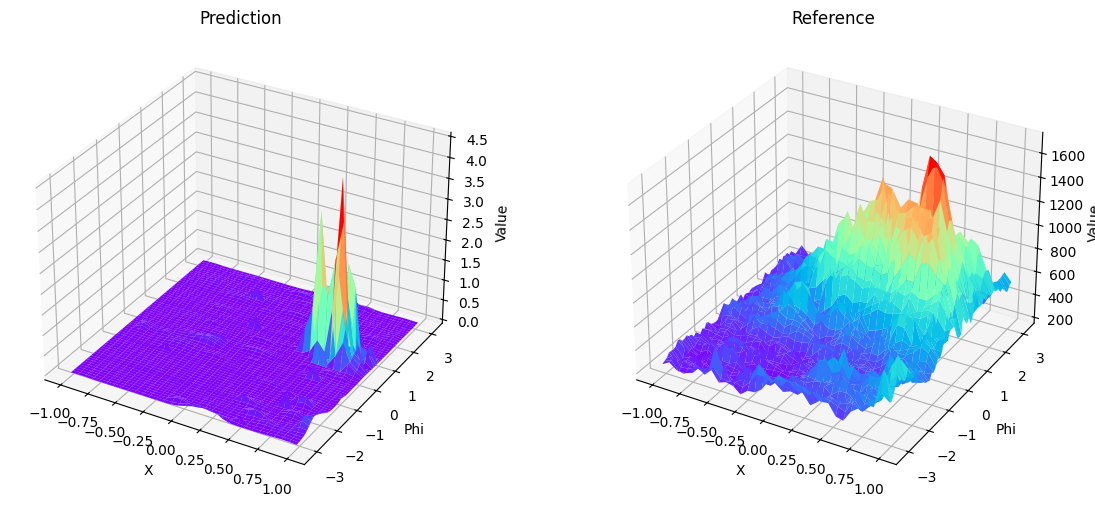

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_outputs_3d(references, predictions):
    # Define the ranges for theta and phi
    z_min, z_max = -1, 1
    phi_min, phi_max = -np.pi, np.pi

    # Create meshgrid for 3D plotting
    z_in = np.linspace(-1, 1, 32)
    theta_in=np.linspace(-np.pi, np.pi, 64)

    Z, Phi = np.meshgrid(z_in, theta_in, indexing='ij')
    target_img = references
    predict_img = predictions

    # Set up subplots for 3D visualization
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    # Plot 3D surface for the multi-vMF output
    ax1.plot_surface(Z, Phi, predict_img, rstride=1, cstride=1, cmap='rainbow')
    ax1.set_title(f'Prediction')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Phi')
    ax1.set_zlabel('Value')
    # Plot 3D surface for the target ray data
    ax2.plot_surface(Z, Phi, target_img, rstride=1, cstride=1, cmap='rainbow')
    ax2.set_title(f'Reference')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Phi')
    ax2.set_zlabel('Value')
    # Show the figure
    plt.show()

plot_outputs_3d(H, EM_results)